## Data Quality Check for the SDO ML v2 Dataset

There are np.nan values in some of the images, which leads to problems when training ML models.

For example for the following times in 171A (fdl-sdoml-v2/sdomlv2.zarr/2020/171A): 

```
{
  "T_OBS": [
    "2020-02-24T01:48:10.35Z",
    "2020-02-24T01:54:10.35Z",
    "2020-02-24T02:00:10.35Z",
    "2020-02-24T02:06:10.35Z",
    "2020-02-24T02:12:10.35Z",
    "2020-02-24T02:18:10.34Z",
    "2020-02-24T02:24:10.35Z",
    "2020-02-24T02:30:10.35Z",
    "2020-02-24T02:36:10.35Z",
    "2020-02-24T02:42:10.34Z",
    "2020-02-24T02:48:10.35Z",
    "2020-02-24T02:54:10.34Z"
  ]
}
```

Given a Pytorch DataLoader (an example can be found [here](https://github.com/i4Ds/sdo-cli/blob/main/src/sdo/sood/data/sdo_ml_v2_dataset.py), the issue can be reproduced as follows:

```
for batch_idx, samples in enumerate(loader):
    X, attrs = samples
    for i, x in enumerate(X):
        if np.isnan(x).any():
            obs_time = attrs["T_OBS"][i]
            print(f"found invalid sample at {obs_time}")
```

The resulting tensor will contain np.nan values:

```
tensor([[[nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           ...,
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan]]]))
```

https://github.com/SDOML/SDOMLv2/issues/1

In [1]:
from sdo.sood.data.sdo_ml_v2_dataset import SDOMLv2NumpyDataset, get_default_transforms

/home/marius/sdo-cli/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch.utils.data import DataLoader

storage_root = "/mnt/nas05/astrodata01/astroml_data/sdomlv2_full/sdomlv2.zarr"
storage_driver = "fs"
year = None
channel="171A"
cache_max_size =  2*1024*1024*2014
target_size=512
transforms = get_default_transforms(
            target_size=target_size, channel=channel)

In [ ]:
dataset = SDOMLv2NumpyDataset(
                storage_root=storage_root,
                storage_driver=storage_driver,
                cache_max_size=cache_max_size,
                year=year,
                channel=channel,
                transforms=transforms,
                start=None,
                end=None,
                freq=None,
                irradiance=None,
                irradiance_channel=None,
                goes_cache_dir=None,
                n_items=None,
)

loader = DataLoader(dataset, batch_size=64,
                          shuffle=False,
                          num_workers=16,
                          prefetch_factor=2)

In [16]:
import numpy as np

invalid_times = []
for batch_idx, samples in enumerate(loader):
    print(f"checking batch {batch_idx}")
    X, attrs = samples
    for i, x in enumerate(X):
        if np.isnan(x).any():
            obs_time = attrs["T_OBS"][i]
            invalid_times.append(obs_time)
            print(f"found invalid sample at {obs_time}")

checking batch 0
checking batch 1
checking batch 2
checking batch 3
checking batch 4
checking batch 5
checking batch 6
checking batch 7
checking batch 8
checking batch 9
checking batch 10
checking batch 11
checking batch 12
checking batch 13
checking batch 14
checking batch 15
checking batch 16
checking batch 17
checking batch 18
checking batch 19
checking batch 20
checking batch 21
checking batch 22
checking batch 23
checking batch 24
checking batch 25
checking batch 26
checking batch 27
checking batch 28
checking batch 29
checking batch 30
checking batch 31
checking batch 32
checking batch 33
checking batch 34
checking batch 35
checking batch 36
checking batch 37
checking batch 38
checking batch 39
checking batch 40
checking batch 41
checking batch 42
checking batch 43
checking batch 44
checking batch 45
checking batch 46
checking batch 47
checking batch 48
checking batch 49
checking batch 50
checking batch 51
checking batch 52
checking batch 53
checking batch 54
checking batch 55
ch

In [17]:
import json

json.dumps({"T_OBS": invalid_times})

'{"T_OBS": ["2020-02-24T01:48:10.35Z", "2020-02-24T01:54:10.35Z", "2020-02-24T02:00:10.35Z", "2020-02-24T02:06:10.35Z", "2020-02-24T02:12:10.35Z", "2020-02-24T02:18:10.34Z", "2020-02-24T02:24:10.35Z", "2020-02-24T02:30:10.35Z", "2020-02-24T02:36:10.35Z", "2020-02-24T02:42:10.34Z", "2020-02-24T02:48:10.35Z", "2020-02-24T02:54:10.34Z"]}'

In [3]:
import matplotlib.pyplot as plt

def show_grid(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(figsize=(24,24), ncols=4, nrows=int(len(imgs)/4), squeeze=False)
    row = 0
    for i, img in enumerate(imgs):
        col = i % 4
        if i != 0 and i % 4 == 0:
            row = row + 1
        axs[row, col].imshow(img)
        axs[row, col].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()

In [4]:
dataset = SDOMLv2NumpyDataset(
                storage_root=storage_root,
                storage_driver=storage_driver,
                cache_max_size=cache_max_size,
                year="2020",
                channel=channel,
                transforms=None,
                start="2020-02-24T00:48:10.35Z",
                end="2020-02-24T03:54:10.34Z",
                freq=None,
                irradiance=None,
                irradiance_channel=None,
                goes_cache_dir=None,
                n_items=None,
)

loader = DataLoader(dataset, batch_size=64,
                          shuffle=False,
                          num_workers=16,
                          prefetch_factor=2)

attr DRMS_ID does not have the same length (239) as the data (85985), dropping it...
attr GCIEC_X has None values, dropping it...
attr GCIEC_Y has None values, dropping it...
attr GCIEC_Z has None values, dropping it...
attr HCIEC_X has None values, dropping it...
attr HCIEC_Y has None values, dropping it...
attr HCIEC_Z has None values, dropping it...
attr HEADSUM does not have the same length (239) as the data (85985), dropping it...
attr LONGSTRN does not have the same length (239) as the data (85985), dropping it...
attr OSCNMEAN has None values, dropping it...
attr OSCNRMS has None values, dropping it...
attr PRIMARYK does not have the same length (239) as the data (85985), dropping it...
attr ROI_LLX1 has None values, dropping it...
attr ROI_LLX2 has None values, dropping it...
attr ROI_LLY1 has None values, dropping it...
attr ROI_LLY2 has None values, dropping it...
attr ROI_NAX1 has None values, dropping it...
attr ROI_NAX2 has None values, dropping it...
attr ROI_NAY1 has Non

In [5]:
import numpy as np
invalid_samples = []
for batch_idx, samples in enumerate(loader):
    print(f"checking batch {batch_idx}")
    X, attrs = samples
    for i, x in enumerate(X):
        if np.isnan(x).any():
            obs_time = attrs["T_OBS"][i]
            invalid_samples.append((obs_time, x))

checking batch 0


In [6]:
invalid_samples

[('2020-02-24T01:48:10.35Z',
  tensor([[[nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           ...,
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan]]])),
 ('2020-02-24T01:54:10.35Z',
  tensor([[[nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           ...,
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan]]])),
 ('2020-02-24T02:00:10.35Z',
  tensor([[[nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           ...,
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, na

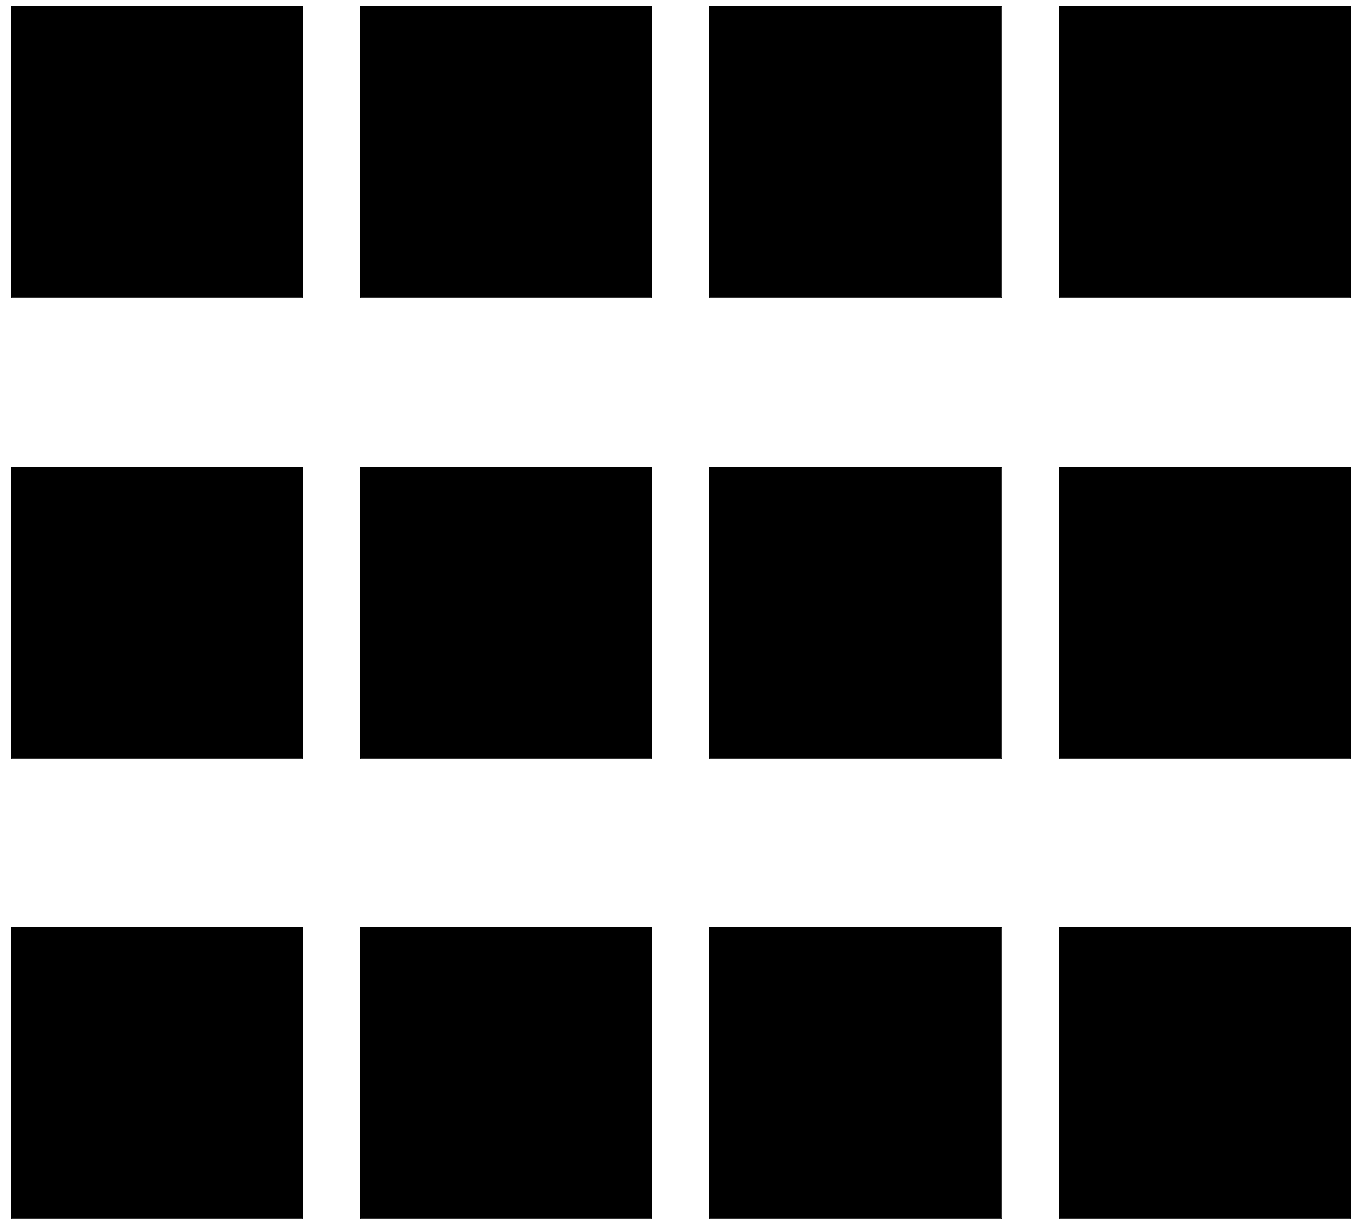

In [8]:
from PIL import Image

V = []
for obs_time, x in invalid_samples:
    
    x = x.permute(1,2,0) # torch to pillow
    x = np.squeeze(x.numpy())
        #v = vis(x, channel_to_map(193), get_clip(x, 171))
    V.append(Image.fromarray(x))
show_grid(V)